# Business Question: How does crime rate in US states impact the Yelp ratings of businesses?

### Hypothesis 1: States with higher crime rates tend to have lower yelp ratings and lower user engagement.

### Import relevant libraries

In [ ]:
# loading in libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as stats
import scipy as sc
import matplotlib.pyplot as plt
!pip install adjustText
from adjustText import adjust_text

### Import relevant datasets

In [ ]:
# Import crime dataset
df_crime = pd.read_csv("estimated_crimes_1979_2019.csv")
df_crime.rename(columns={'state_abbr': 'state'}, inplace=True)
df_crime

,year,state,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
0,1979,WY,Wyoming,450000,1579,41,124.0,NaN,190,1224,20129,3887,14607,1635
1,1980,WY,Wyoming,468954,1841,29,134.0,NaN,208,1470,21543,4238,15686,1619
2,1981,WY,Wyoming,492000,2116,27,174.0,NaN,206,1709,23133,4728,16972,1433
3,1982,WY,Wyoming,502000,1527,46,136.0,NaN,172,1173,22589,4432,16903,1254
4,1983,WY,Wyoming,514000,1219,30,110.0,NaN,153,926,19412,3626,14932,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2015,AK,Alaska,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046
2070,2016,AK,Alaska,741522,5966,52,754.0,1053.0,850,4011,24876,4053,17766,3057
2071,2017,AK,Alaska,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254
2072,2018,AK,Alaska,735139,6555,47,NaN,1212.0,896,4400,24345,3985,16364,3996


In [ ]:
# Import Yelp Business dataset
df_business = pd.read_csv("YelpbusinessFULL.csv")
df_business

<ipython-input-45-5b65fb3a4f29>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_business = pd.read_csv("YelpbusinessFULL.csv")


,bid,business_id,name,address,city,state,postal_code,stars,review_count
0,1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,5.0,7.0
1,2,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,3.0,15.0
2,3,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,3.5,22.0
3,4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0
4,5,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,4.5,13.0
...,...,...,...,...,...,...,...,...,...
150341,150342,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,0,3.0,13.0
150342,150343,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,4.0,5.0
150343,150344,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,3.5,8.0
150344,150345,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,4.0,24.0


In [ ]:
# Import Yelp average rating by state dataset
df_average_rating = pd.read_csv("Yelpavg_rating_by_state.csv")
df_average_rating

,state,avg_stars
0,CA,3.996733
1,MO,3.546092
2,AZ,3.592010
3,PA,3.573019
4,TN,3.571500
5,FL,3.610957
6,IN,3.588246
7,LA,3.679162
8,AB,3.447515
9,NV,3.736876


### Data Manipulation

In [ ]:
# Joining the datasets together
df_businesscrime1 = pd.merge(df_crime, df_business, on='state', how='inner')
df_businesscrime = pd.merge(df_businesscrime1, df_average_rating, on='state', how='inner')
df_businesscrime

,year,state,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,...,motor_vehicle_theft,bid,business_id,name,address,city,postal_code,stars,review_count,avg_stars
0,1979,WA,Washington,3926000,17064,187,1821.0,NaN,4739,10317,...,17057,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000
1,1979,WA,Washington,3926000,17064,187,1821.0,NaN,4739,10317,...,17057,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000
2,1980,WA,Washington,4113331,19098,225,2169.0,NaN,5558,11146,...,16272,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000
3,1980,WA,Washington,4113331,19098,225,2169.0,NaN,5558,11146,...,16272,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000
4,1981,WA,Washington,4212000,18839,213,2115.0,NaN,5475,11036,...,13445,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935565,2019,AZ,Arizona,7278717,33141,365,NaN,3662.0,6410,22704,...,18151,150286,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,85743,4.5,448.0,3.59201
5935566,2019,AZ,Arizona,7278717,33141,365,NaN,3662.0,6410,22704,...,18151,150306,ftktEa20LdO6DHcZRXspTA,Rest Easy Auto Worx,"3855 South Evans Blvd, Ste 405",Tucson,85714,4.5,9.0,3.59201
5935567,2019,AZ,Arizona,7278717,33141,365,NaN,3662.0,6410,22704,...,18151,150310,7omkeqEv-kKMIn9kmOR6Lw,"David Oase, CPA",7802 E Escalante Rd,Tucson,85730,5.0,8.0,3.59201
5935568,2019,AZ,Arizona,7278717,33141,365,NaN,3662.0,6410,22704,...,18151,150329,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,85737,4.5,41.0,3.59201


In [ ]:
# Calculating the crime rate and adding it as a column
df_businesscrime.fillna(0, inplace=True)
df_businesscrime['crime_rate'] = (df_businesscrime['violent_crime'] + df_businesscrime['homicide'] + df_businesscrime['rape_legacy'] + df_businesscrime['rape_revised'] + df_businesscrime['robbery']+ df_businesscrime['aggravated_assault']+ df_businesscrime['property_crime']+ df_businesscrime['burglary']+ df_businesscrime['larceny']+ df_businesscrime['motor_vehicle_theft']) / df_businesscrime['population']
df_businesscrime

,year,state,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,...,bid,business_id,name,address,city,postal_code,stars,review_count,avg_stars,crime_rate
0,1979,WA,Washington,3926000,17064,187,1821.0,0.0,4739,10317,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.130590
1,1979,WA,Washington,3926000,17064,187,1821.0,0.0,4739,10317,...,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000,0.130590
2,1980,WA,Washington,4113331,19098,225,2169.0,0.0,5558,11146,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.138300
3,1980,WA,Washington,4113331,19098,225,2169.0,0.0,5558,11146,...,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000,0.138300
4,1981,WA,Washington,4212000,18839,213,2115.0,0.0,5475,11036,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.134840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935565,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150286,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,85743,4.5,448.0,3.59201,0.057917
5935566,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150306,ftktEa20LdO6DHcZRXspTA,Rest Easy Auto Worx,"3855 South Evans Blvd, Ste 405",Tucson,85714,4.5,9.0,3.59201,0.057917
5935567,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150310,7omkeqEv-kKMIn9kmOR6Lw,"David Oase, CPA",7802 E Escalante Rd,Tucson,85730,5.0,8.0,3.59201,0.057917
5935568,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150329,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,85737,4.5,41.0,3.59201,0.057917


In [ ]:
# Only looking at dates between 1997 - 2019
df_businesscrime = df_businesscrime[df_businesscrime['year'] >= 1997]
df_businesscrime

,year,state,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,...,bid,business_id,name,address,city,postal_code,stars,review_count,avg_stars,crime_rate
36,1997,WA,Washington,5610000,24724,244,2885.0,0.0,6734,14864,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.118527
37,1997,WA,Washington,5610000,24724,244,2885.0,0.0,6734,14864,...,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000,0.118527
38,1998,WA,Washington,5689000,24380,224,2740.0,0.0,6577,14839,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.117349
39,1998,WA,Washington,5689000,24380,224,2740.0,0.0,6577,14839,...,29607,qbh_Xg-wfgk_qINdyApMag,Valvoline Instant Oil Change,325 NE Myra Road,College Place,99324,4.5,13.0,3.50000,0.117349
40,1999,WA,Washington,5756361,21716,171,2711.0,0.0,5808,13026,...,10949,kNK3tjrKa6e_Tf9c9WWehA,Suave Nails,4013 N Market St,Spokane,99207,2.5,6.0,3.50000,0.105104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935565,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150286,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,85743,4.5,448.0,3.59201,0.057917
5935566,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150306,ftktEa20LdO6DHcZRXspTA,Rest Easy Auto Worx,"3855 South Evans Blvd, Ste 405",Tucson,85714,4.5,9.0,3.59201,0.057917
5935567,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150310,7omkeqEv-kKMIn9kmOR6Lw,"David Oase, CPA",7802 E Escalante Rd,Tucson,85730,5.0,8.0,3.59201,0.057917
5935568,2019,AZ,Arizona,7278717,33141,365,0.0,3662.0,6410,22704,...,150329,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,85737,4.5,41.0,3.59201,0.057917


### Data Analysis: Crime and Star Ratings

Understanding the relationship between crime rate by state and the average yelp restaurant star rating between the year 1997 - 2019.

The type of crime that was collected is limited. The crime categories collected and analyzed are shown below:

* Violent crime
* Homicide
* Rape
* Robbery
* Aggravated assault
* Property crime
* Burglary
* Larceny
* Motor vehicle theft

In [ ]:
# Grouping by state
grouped_by_state = df_businesscrime.groupby('state')['crime_rate','stars'].mean()
grouped_by_state.rename(columns={'crime_rate': 'avg_crime_rate', 'stars': 'avg_star_rating'}, inplace=True)
grouped_by_state

<ipython-input-50-8fc5d8c4385e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_state = df_businesscrime.groupby('state')['crime_rate','stars'].mean()


,avg_crime_rate,avg_star_rating
state,,
AZ,0.095401,3.592010
CA,0.069689,3.996733
CO,0.071436,4.000000
DE,0.078878,3.354967
FL,0.090496,3.610957
HI,0.085719,4.250000
ID,0.051433,3.707634
IL,0.068008,3.369697
IN,0.069318,3.588246


In [ ]:
# Creating a new dataframe for further analysis and data visualization
df_crime_avgstars_by_state = grouped_by_state.sort_values(by='avg_crime_rate', ascending=False)
df_crime_avgstars_by_state
# Create the new dataframe
df_crime_avgstars_by_state = pd.DataFrame(df_crime_avgstars_by_state).reset_index()
df_crime_avgstars_by_state

,state,avg_crime_rate,avg_star_rating
0,AZ,0.095401,3.592010
1,LA,0.093117,3.679029
2,FL,0.090496,3.610957
3,WA,0.089187,3.500000
4,TN,0.088589,3.571500
5,HI,0.085719,4.250000
6,TX,0.085444,2.875000
7,NC,0.082444,2.000000
8,NV,0.081237,3.736876
9,MO,0.080872,3.546092


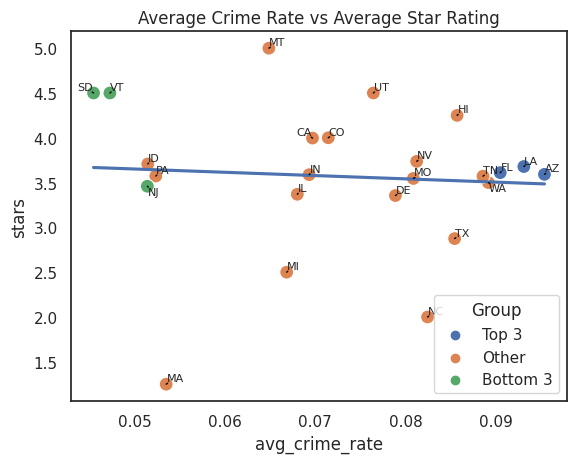

In [ ]:
# Identifying top 3 and bottom 3 states by Crime Rate
top_3_states = df_crime_avgstars_by_state.nlargest(3, 'avg_crime_rate')
bottom_3_states = df_crime_avgstars_by_state.nsmallest(3, 'avg_crime_rate')

df_crime_avgstars_by_state['Group'] = 'Other'
df_crime_avgstars_by_state.loc[df_crime_avgstars_by_state['state'].isin(top_3_states['state']), 'Group'] = 'Top 3'
df_crime_avgstars_by_state.loc[df_crime_avgstars_by_state['state'].isin(bottom_3_states['state']), 'Group'] = 'Bottom 3'

# Scatterplot of average crime rate against average star rating
sns.scatterplot(x='avg_crime_rate', y='avg_star_rating', hue='Group', data=df_crime_avgstars_by_state, s=100);

# Adding a trendline to the scatter plot
sns.regplot(x='avg_crime_rate', y='avg_star_rating', data=df_crime_avgstars_by_state, scatter=False, ci=None)

# Displaying labels for each point
texts = [plt.text(row['avg_crime_rate'], row['avg_star_rating'], row['state'], fontsize=8, ha='right', va='bottom') for index, row in df_crime_avgstars_by_state.iterrows()]

adjust_text(texts, force_points=0.3, arrowprops=dict(arrowstyle='-', color='black'))

# Showing legend
plt.legend(title='Group', loc='lower right')

# Adding a title to the chart
plt.title('Average Crime Rate vs Average Star Rating')
plt.xlabel('avg_crime_rate')
plt.ylabel('stars')

# Showing the plot
plt.show()

### Data Analysis: Crime and Yelp App User Engagement

Understanding the relationship between crime rate by state and yelp user engagment between the years 1997 - 2019.

In [ ]:
# Grouping by state for user engagement
grouped_by_state_ue = df_businesscrime.groupby('state')['crime_rate','review_count'].mean()
grouped_by_state_ue.rename(columns={'crime_rate': 'avg_crime_rate', 'review_count': 'avg_review_count'}, inplace=True)
grouped_by_state_ue

<ipython-input-53-33900bd2b647>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_state_ue = df_businesscrime.groupby('state')['crime_rate','review_count'].mean()


,avg_crime_rate,avg_review_count
state,,
AZ,0.095401,41.630246
CA,0.069689,65.277148
CO,0.071436,10.000000
DE,0.078878,29.743929
FL,0.090496,42.534220
HI,0.085719,16.000000
ID,0.051433,34.046564
IL,0.068008,23.158974
IN,0.069318,42.016982


In [ ]:
# Creating a new dataframe for further analysis and data visualization
df_crime_avgreviews_by_state = grouped_by_state_ue.sort_values(by='avg_crime_rate', ascending=False)
df_crime_avgreviews_by_state
# Create the new dataframe
df_crime_avgreviews_by_state = pd.DataFrame(df_crime_avgreviews_by_state).reset_index()
df_crime_avgreviews_by_state

,state,avg_crime_rate,avg_review_count
0,AZ,0.095401,41.630246
1,LA,0.093117,74.893782
2,FL,0.090496,42.534220
3,WA,0.089187,9.500000
4,TN,0.088589,49.618033
5,HI,0.085719,16.000000
6,TX,0.085444,8.250000
7,NC,0.082444,29.000000
8,NV,0.081237,53.136747
9,MO,0.080872,44.341336


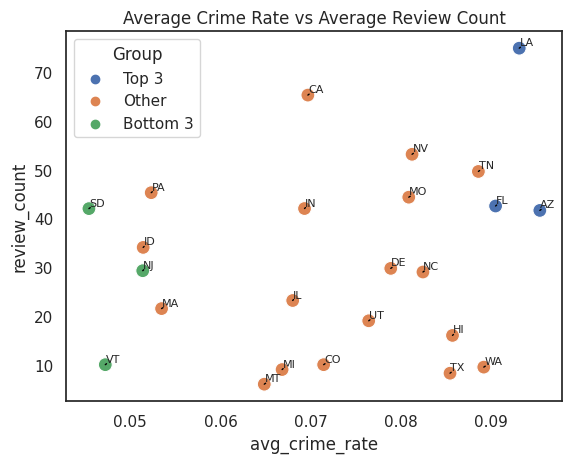

In [ ]:
# Identifying top 3 and bottom 3 states by review count
top_3_states = df_crime_avgreviews_by_state.nlargest(3, 'avg_crime_rate')
bottom_3_states = df_crime_avgreviews_by_state.nsmallest(3, 'avg_crime_rate')

df_crime_avgreviews_by_state['Group'] = 'Other'
df_crime_avgreviews_by_state.loc[df_crime_avgreviews_by_state['state'].isin(top_3_states['state']), 'Group'] = 'Top 3'
df_crime_avgreviews_by_state.loc[df_crime_avgreviews_by_state['state'].isin(bottom_3_states['state']), 'Group'] = 'Bottom 3'

# Scatterplot of average gdp against average star rating
sns.scatterplot(x='avg_crime_rate', y='avg_review_count', hue='Group', data=df_crime_avgreviews_by_state, s=100);
sns.set_style('white')
# Displaying labels for each point
texts = [plt.text(row['avg_crime_rate'], row['avg_review_count'], row['state'], fontsize=8, ha='right', va='bottom') for index, row in df_crime_avgreviews_by_state.iterrows()]

adjust_text(texts, force_points=0.3, arrowprops=dict(arrowstyle='-', color='black'))


# Showing legend
plt.legend(title='Group', loc='upper left')

# Adding a title to the chart
plt.title('Average Crime Rate vs Average Review Count')
plt.xlabel('avg_crime_rate')
plt.ylabel('review_count')

# Showing the plot
plt.show()